# YOLOX Hunman检测模型训练与转换



In [ ]:
!python -V

Python 3.7.10


In [ ]:
!/home/ma-user/anaconda3/bin/conda create -n python-3.10.10 python=3.10.10 -y --override-channels --channel https://mirrors.tuna.tsinghua.edu.cn/anaconda/pkgs/main
!/home/ma-user/anaconda3/envs/python-3.10.10/bin/pip install ipykernel

/home/ma-user/anaconda3/lib/python3.7/site-packages/requests/__init__.py:91: RequestsDependencyWarning: urllib3 (1.26.12) or chardet (3.0.4) doesn't match a supported version!
  RequestsDependencyWarning)
Solving environment: failed with repodata from current_repodata.json, will retry with next repodata source.
Solving environment: done

## Package Plan ##

  environment location: /home/ma-user/anaconda3/envs/python-3.10.10

  added / updated specs:
    - python=3.10.10


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    _libgcc_mutex-0.1          |             main           3 KB  https://mirrors.tuna.tsinghua.edu.cn/anaconda/pkgs/main
    _openmp_mutex-5.1          |            1_gnu          21 KB  https://mirrors.tuna.tsinghua.edu.cn/anaconda/pkgs/main
    bzip2-1.0.8                |       h5eee18b_6         262 KB  https://mirrors.tuna.tsinghua.edu.cn/anaconda/pkgs/main
    ca-certif

In [ ]:
import json
import os

data = {
    # kernel 显示的名称
   "display_name": "python-3.10.10",
    # 上面创建的虚拟环境路径
   "env": {
      "PATH": "/home/ma-user/anaconda3/envs/python-3.10.10/bin:/home/ma-user/anaconda3/envs/python-3.7.10/bin:/modelarts/authoring/notebook-conda/bin:/opt/conda/bin:/usr/local/nvidia/bin:/usr/local/cuda/bin:/usr/local/sbin:/usr/local/bin:/usr/sbin:/usr/bin:/sbin:/bin:/home/ma-user/modelarts/ma-cli/bin:/home/ma-user/modelarts/ma-cli/bin:/home/ma-user/anaconda3/envs/PyTorch-1.8/bin"
   },
    # 人生苦短，我用python
   "language": "python",
    # 执行参数
   "argv": [
      "/home/ma-user/anaconda3/envs/python-3.10.10/bin/python",
      "-m",
      "ipykernel",
      "-f",
      "{connection_file}"
   ]
}

if not os.path.exists("/home/ma-user/anaconda3/share/jupyter/kernels/python-3.10.10/"):
    os.mkdir("/home/ma-user/anaconda3/share/jupyter/kernels/python-3.10.10/")

with open('/home/ma-user/anaconda3/share/jupyter/kernels/python-3.10.10/kernel.json', 'w') as f:
    json.dump(data, f, indent=4)

In [ ]:
!python -V

Python 3.10.10


## 拉取代码、配置环境

首先拉取YOLOX代码：

In [2]:
import os

if not os.path.exists("https://github.com/airockchip/YOLOX-rk"):
    os.system("git clone https://github.com/airockchip/YOLOX")

可以看到项目已拉取到当前目录下，进入YOLOX目录：

In [2]:
%cd YOLOX

/home/ma-user/work/ma_share/YOLOX


/home/ma-user/anaconda3/envs/python-3.10.10/lib/python3.10/site-packages/IPython/core/magics/osm.py:417: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


查看项目代码组织：

In [2]:
%ll

total 84
-rw-r-----  1 ma-user 11371 Jun  5 22:34 LICENSE
-rw-r-----  1 ma-user    75 Jun  5 22:34 MANIFEST.in
-rw-r-----  1 ma-user 11316 Jun  5 22:34 README.md
-rw-r-----  1 ma-user   796 Jun  5 22:34 README_rkopt.md
-rw-r-----  1 ma-user   959 Jun  5 22:34 README_rkopt_manual.md
drwxr-x---  2 ma-user  1280 Jun  5 22:34 assets/
drwxr-x---  2 ma-user   512 Jun  5 22:34 datasets/
drwxr-x---  7 ma-user  1536 Jun  5 22:34 demo/
drwxr-x---  4 ma-user  3584 Jun  5 22:34 docs/
drwxr-x---  4 ma-user   768 Jun  5 22:34 exps/
-rw-r-----  1 ma-user   340 Jun  5 22:34 hubconf.py
-rw-r-----  1 ma-user   307 Jun  5 22:34 requirements.txt
-rw-r-----  1 ma-user   615 Jun  5 22:34 setup.cfg
-rw-r-----  1 ma-user  2710 Jun  5 22:34 setup.py
drwxr-x---  3 ma-user   768 Jun  5 22:34 tests/
drwxr-x---  2 ma-user  2048 Jun  5 22:34 tools/
drwxr-x--- 10 ma-user  2560 Jun  5 22:34 yolox/


其中，核心代码位于yolox文件夹下，包含数据处理相关代码data、模型结构相关代码models等。
```shell
YOLOX
├── requirements.txt
├── demo                                            // 多种框架推理demo
├── exps                                            // 训练配置文件
│   ├── default
│   │   ├── yolox_s.py
│   │   ├── ...
│   └── example
│       └── yolox_voc
│           └── yolox_voc_s.py
├── tools
│   ├── eval.py
│   ├── ...
│   └── train.py
└── yolox                                           // yolox框架核心代码
    ├── __init__.py
    ├── core
    │   ├── __init__.py
    │   ├── launch.py
    │   └── trainer.py
    ├── data
    │   ├── data_augment.py
    │   ├── dataloading.py
    │   ├── data_prefetcher.py
    │   ├── datasets
    │   │   ├── coco_classes.py
    │   │   ├── coco.py
    │   │   ├── datasets_wrapper.py
    │   │   ├── __init__.py
    │   │   ├── mosaicdetection.py                  // mosic数据增强
    │   │   ├── voc_classes.py
    │   │   └── voc.py
    │   ├── __init__.py
    │   └── samplers.py
    ├── models
    │   ├── darknet.py
    │   ├── __init__.py
    │   ├── losses.py
    │   ├── network_blocks.py
    │   ├── yolo_fpn.py
    │   ├── yolo_head.py                            // Decoupled Head，Multi positives，SimOTA
    │   ├── yolo_pafpn.py
    │   └── yolox.py
    └── utils
```

了解了基本的代码结构，接下来配置一下环境：

In [3]:
!nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2019 NVIDIA Corporation
Built on Wed_Oct_23_19:24:38_PDT_2019
Cuda compilation tools, release 10.2, V10.2.89


In [27]:
!nvidia-smi

Thu Jun  5 23:20:59 2025       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 470.57.02    Driver Version: 470.57.02    CUDA Version: 11.4     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  On   | 00000000:00:0D.0 Off |                    0 |
| N/A   36C    P0    26W / 250W |      0MiB / 16280MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [8]:
!cat requirements.txt

# TODO: Update with exact module version
numpy
torch>=1.7
opencv_python
loguru
scikit-image
tqdm
torchvision
Pillow
thop
ninja
tabulate
tensorboard

# verified versions
# pycocotools corresponds to https://github.com/ppwwyyxx/cocoapi
pycocotools>=2.0.2
onnx==1.8.1
onnxruntime==1.8.0
onnx-simplifier==0.3.5


In [21]:
%%writefile requirements.txt

# TODO: Update with exact module version
numpy==1.21.6
torch==1.11.0
opencv_python
loguru
scikit-image==0.20.0
tqdm
torchvision
Pillow
thop
ninja
tabulate
tensorboard

# verified versions
# pycocotools corresponds to https://github.com/ppwwyyxx/cocoapi
pycocotools>=2.0.2
onnx==1.13.1 
onnxruntime==1.13.1
onnx-simplifier==0.3.5

Overwriting requirements.txt


In [ ]:
!pip install -r requirements.txt

Looking in indexes: http://repo.myhuaweicloud.com/repository/pypi/simple
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.9/15.9 MB 79.2 MB/s eta 0:00:0000:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 750.6/750.6 MB 65.9 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.0/63.0 MB 188.4 MB/s eta 0:00:0000:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.2/13.2 MB 64.9 MB/s eta 0:00:0000:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.2/7.2 MB 44.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 97.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 103.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.5/13.5 MB 131.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 89.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.7/37.7 MB 114.3 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7

In [ ]:
!pip list

Package                 Version
----------------------- --------------------
absl-py                 2.3.0
asttokens               3.0.0
certifi                 2025.4.26
charset-normalizer      3.4.2
coloredlogs             15.0.1
comm                    0.2.2
debugpy                 1.8.14
decorator               5.2.1
exceptiongroup          1.3.0
executing               2.2.0
flatbuffers             25.2.10
grpcio                  1.72.1
humanfriendly           10.0
idna                    3.10
imageio                 2.37.0
ipykernel               6.29.5
ipython                 8.37.0
jedi                    0.19.2
jupyter_client          8.6.3
jupyter_core            5.8.1
lazy_loader             0.4
loguru                  0.7.3
Markdown                3.8
MarkupSafe              3.0.2
matplotlib-inline       0.1.7
mpmath                  1.3.0
nest-asyncio            1.6.0
networkx                3.4.2
ninja                   1.11.1.4
numpy                   1.21.6
onnx        

安装一下YOLOX方便训练

In [ ]:
!pip3 install -v -e . 

Using pip 25.1 from /home/ma-user/anaconda3/envs/python-3.10.10/lib/python3.10/site-packages/pip (python 3.10)
Looking in indexes: http://repo.myhuaweicloud.com/repository/pypi/simple
Obtaining file:///home/ma-user/work/ma_share/YOLOX
  Running command python setup.py egg_info
  /home/ma-user/anaconda3/envs/python-3.10.10/lib/python3.10/site-packages/setuptools/__init__.py:94: _DeprecatedInstaller: setuptools.installer and fetch_build_eggs are deprecated.
  !!

          ********************************************************************************
          Requirements should be satisfied by a PEP 517 installer.
          If you are using pip, you can try `pip install --use-pep517`.
          ********************************************************************************

  !!
    dist.fetch_build_eggs(dist.setup_requires)
  /home/ma-user/anaconda3/envs/python-3.10.10/lib/python3.10/site-packages/setuptools/dist.py:759: SetuptoolsDeprecationWarning: License classifiers are depreca

## 准备数据

In [15]:
import moxing as mox
import os

if not os.path.exists("hunman_voc_format_5k.zip"):
    # mox.file.copy("obs://obs2learn/dataset/person_5k/hunman_voc_format_5k.zip", "hunman_voc_format_5k.zip")
    mox.file.copy("/home/ma-user/work/ma_share/door-YOLOX-det/YOLOX/hunman_voc_format_5k.zip", "hunman_voc_format_5k.zip")

In [16]:
import moxing as mox
import os

if not os.path.exists("datasets/pascal_voc_format"):
    os.system("unzip -q hunman_voc_format_5k.zip -d datasets")

In [ ]:
!cat yolox/data/datasets/voc_classes.py

In [17]:
%%writefile yolox/data/datasets/voc_classes.py
#!/usr/bin/env python3
# -*- coding:utf-8 -*-
# Copyright (c) Megvii, Inc. and its affiliates.

# VOC_CLASSES = ( '__background__', # always index 0
VOC_CLASSES = (
    "human",
)

Overwriting yolox/data/datasets/voc_classes.py


## 准备训练配置文件

我们采用yolox_s结构进行训练，参考YOLOX/exps/example/yolox_voc/yolox_voc_s.py与YOLOX/yolox/exp/yolox_base.py准备训练配置文件。
我们的数据共包含两类，输入大小为320

In [18]:
!cat exps/example/yolox_voc/yolox_voc_s.py

# encoding: utf-8
import os

import torch
import torch.distributed as dist

from yolox.data import get_yolox_datadir
from yolox.exp import Exp as MyExp


class Exp(MyExp):
    def __init__(self):
        super(Exp, self).__init__()
        self.num_classes = 20
        self.depth = 0.33
        self.width = 0.50
        self.warmup_epochs = 1

        # ---------- transform config ------------ #
        self.mosaic_prob = 1.0
        self.mixup_prob = 1.0
        self.hsv_prob = 1.0
        self.flip_prob = 0.5

        self.exp_name = os.path.split(os.path.realpath(__file__))[1].split(".")[0]

    def get_data_loader(self, batch_size, is_distributed, no_aug=False, cache_img=False):
        from yolox.data import (
            VOCDetection,
            TrainTransform,
            YoloBatchSampler,
            DataLoader,
            InfiniteSampler,
            MosaicDetection,
            worker_init_reset_seed,
        )
        from yolox.utils import (
            wait_for_the_mast

In [23]:
%%writefile exps/example/yolox_voc/yolox_voc_s_human.py

# encoding: utf-8
import os

import torch
import torch.distributed as dist

from yolox.data import get_yolox_datadir
from yolox.exp import Exp as MyExp


class Exp(MyExp):
    def __init__(self):
        super(Exp, self).__init__()
        self.num_classes = 1
        self.depth = 0.33
        self.width = 0.50
        self.warmup_epochs = 1

        # ---------- transform config ------------ #
        self.mosaic_prob = 1.0
        self.mixup_prob = 1.0
        self.hsv_prob = 1.0
        self.flip_prob = 0.5

        self.exp_name = os.path.split(os.path.realpath(__file__))[1].split(".")[0]

    def get_data_loader(self, batch_size, is_distributed, no_aug=False, cache_img=False):
        from yolox.data import (
            VOCDetection,
            TrainTransform,
            YoloBatchSampler,
            DataLoader,
            InfiniteSampler,
            MosaicDetection,
            worker_init_reset_seed,
        )
        from yolox.utils import (
            wait_for_the_master,
            get_local_rank,
        )
        local_rank = get_local_rank()

        with wait_for_the_master(local_rank):
            dataset = VOCDetection(
                data_dir=os.path.join(get_yolox_datadir(), ""),
                image_sets=[('2007', 'trainval')],
                img_size=self.input_size,
                preproc=TrainTransform(
                    max_labels=50,
                    flip_prob=self.flip_prob,
                    hsv_prob=self.hsv_prob),
                cache=cache_img,
            )

        dataset = MosaicDetection(
            dataset,
            mosaic=not no_aug,
            img_size=self.input_size,
            preproc=TrainTransform(
                max_labels=120,
                flip_prob=self.flip_prob,
                hsv_prob=self.hsv_prob),
            degrees=self.degrees,
            translate=self.translate,
            mosaic_scale=self.mosaic_scale,
            mixup_scale=self.mixup_scale,
            shear=self.shear,
            enable_mixup=self.enable_mixup,
            mosaic_prob=self.mosaic_prob,
            mixup_prob=self.mixup_prob,
        )

        self.dataset = dataset

        if is_distributed:
            batch_size = batch_size // dist.get_world_size()

        sampler = InfiniteSampler(
            len(self.dataset), seed=self.seed if self.seed else 0
        )

        batch_sampler = YoloBatchSampler(
            sampler=sampler,
            batch_size=batch_size,
            drop_last=False,
            mosaic=not no_aug,
        )

        dataloader_kwargs = {"num_workers": self.data_num_workers, "pin_memory": True}
        dataloader_kwargs["batch_sampler"] = batch_sampler

        # Make sure each process has different random seed, especially for 'fork' method
        dataloader_kwargs["worker_init_fn"] = worker_init_reset_seed

        train_loader = DataLoader(self.dataset, **dataloader_kwargs)

        return train_loader

    def get_eval_loader(self, batch_size, is_distributed, testdev=False, legacy=False):
        from yolox.data import VOCDetection, ValTransform

        valdataset = VOCDetection(
            data_dir=os.path.join(get_yolox_datadir(), ""),
            image_sets=[('2007', 'test')],
            img_size=self.test_size,
            preproc=ValTransform(legacy=legacy),
        )

        if is_distributed:
            batch_size = batch_size // dist.get_world_size()
            sampler = torch.utils.data.distributed.DistributedSampler(
                valdataset, shuffle=False
            )
        else:
            sampler = torch.utils.data.SequentialSampler(valdataset)

        dataloader_kwargs = {
            "num_workers": self.data_num_workers,
            "pin_memory": True,
            "sampler": sampler,
        }
        dataloader_kwargs["batch_size"] = batch_size
        val_loader = torch.utils.data.DataLoader(valdataset, **dataloader_kwargs)

        return val_loader

    def get_evaluator(self, batch_size, is_distributed, testdev=False, legacy=False):
        from yolox.evaluators import VOCEvaluator

        val_loader = self.get_eval_loader(batch_size, is_distributed, testdev, legacy)
        evaluator = VOCEvaluator(
            dataloader=val_loader,
            img_size=self.test_size,
            confthre=self.test_conf,
            nmsthre=self.nmsthre,
            num_classes=self.num_classes,
        )
        return evaluator



Overwriting exps/example/yolox_voc/yolox_voc_s_human.py


In [24]:
!cat exps/example/yolox_voc/yolox_voc_s_human.py


# encoding: utf-8
import os

import torch
import torch.distributed as dist

from yolox.data import get_yolox_datadir
from yolox.exp import Exp as MyExp


class Exp(MyExp):
    def __init__(self):
        super(Exp, self).__init__()
        self.num_classes = 1
        self.depth = 0.33
        self.width = 0.50
        self.warmup_epochs = 1

        # ---------- transform config ------------ #
        self.mosaic_prob = 1.0
        self.mixup_prob = 1.0
        self.hsv_prob = 1.0
        self.flip_prob = 0.5

        self.exp_name = os.path.split(os.path.realpath(__file__))[1].split(".")[0]

    def get_data_loader(self, batch_size, is_distributed, no_aug=False, cache_img=False):
        from yolox.data import (
            VOCDetection,
            TrainTransform,
            YoloBatchSampler,
            DataLoader,
            InfiniteSampler,
            MosaicDetection,
            worker_init_reset_seed,
        )
        from yolox.utils import (
            wait_for_the_mast

## 训练

接下来即可直接进行训练，训练入口脚本在tools/train.py，可以查看训练参数：

```python
def make_parser():
    parser = argparse.ArgumentParser("YOLOX train parser")
    parser.add_argument("-expn", "--experiment-name", type=str, default=None)
    parser.add_argument("-n", "--name", type=str, default=None, help="model name")

    # distributed
    parser.add_argument(
        "--dist-backend", default="nccl", type=str, help="distributed backend"
    )
    parser.add_argument(
        "--dist-url",
        default=None,
        type=str,
        help="url used to set up distributed training",
    )
    parser.add_argument("-b", "--batch-size", type=int, default=64, help="batch size")
    parser.add_argument(
        "-d", "--devices", default=None, type=int, help="device for training"
    )
    parser.add_argument(
        "-f",
        "--exp_file",
        default=None,
        type=str,
        help="plz input your experiment description file",
    )
    parser.add_argument(
        "--resume", default=False, action="store_true", help="resume training"
    )
    parser.add_argument("-c", "--ckpt", default=None, type=str, help="checkpoint file")
    parser.add_argument(
        "-e",
        "--start_epoch",
        default=None,
        type=int,
        help="resume training start epoch",
    )
    parser.add_argument(
        "--num_machines", default=1, type=int, help="num of node for training"
    )
    parser.add_argument(
        "--machine_rank", default=0, type=int, help="node rank for multi-node training"
    )
    parser.add_argument(
        "--fp16",
        dest="fp16",
        default=False,
        action="store_true",
        help="Adopting mix precision training.",
    )
    parser.add_argument(
        "--cache",
        dest="cache",
        default=False,
        action="store_true",
        help="Caching imgs to RAM for fast training.",
    )
    parser.add_argument(
        "-o",
        "--occupy",
        dest="occupy",
        default=False,
        action="store_true",
        help="occupy GPU memory first for training.",
    )
    parser.add_argument(
        "-l",
        "--logger",
        type=str,
        help="Logger to be used for metrics. \
        Implemented loggers include `tensorboard` and `wandb`.",
        default="tensorboard"
    )
    parser.add_argument(
        "opts",
        help="Modify config options using the command-line",
        default=None,
        nargs=argparse.REMAINDER,
    )
    return parser
```

In [25]:
!pwd

/home/ma-user/work/ma_share/YOLOX


In [ ]:
!YOLOX_DATADIR=datasets/pascal_voc_format python tools/train.py -f exps/example/yolox_voc/yolox_voc_s_human.py -d 0 -b 32 --fp16 -o 

2025-06-05 23:21:27 | INFO     | yolox.core.trainer:130 - args: Namespace(experiment_name='yolox_voc_s_human', name=None, dist_backend='nccl', dist_url=None, batch_size=32, devices=0, exp_file='exps/example/yolox_voc/yolox_voc_s_human.py', resume=False, ckpt=None, start_epoch=None, num_machines=1, machine_rank=0, fp16=True, cache=False, occupy=True, logger='tensorboard', opts=[])
2025-06-05 23:21:27 | INFO     | yolox.core.trainer:131 - exp value:
╒═══════════════════╤════════════════════════════╕
│ keys              │ values                     │
╞═══════════════════╪════════════════════════════╡
│ seed              │ None                       │
├───────────────────┼────────────────────────────┤
│ output_dir        │ './YOLOX_outputs'          │
├───────────────────┼────────────────────────────┤
│ print_interval    │ 10                         │
├───────────────────┼────────────────────────────┤
│ eval_interval     │ 10                         │
├───────────────────┼─────────────────

## 增量训练或利用预训练模型

In [12]:
!YOLOX_DATADIR=datasets/pascal_voc_format python tools/train.py -f exps/example/yolox_voc/yolox_voc_s_human.py -c weights/best_ckpt.pth -d 0 -b 64 --fp16 -o 

2023-04-26 14:56:45 | INFO     | yolox.core.trainer:358 - Save weights to ./YOLOX_outputs/yolox_voc_s_door

2023-04-26 14:56:45 | INFO     | yolox.core.trainer:203 - ---> start train epoch77

2023-04-26 14:56:57 | INFO     | yolox.core.trainer:263 - epoch: 77/300, iter: 10/16, gpu mem: 13650Mb, mem: 14.3Gb, iter_time: 1.229s, data_time: 0.739s, total_loss: 3.5, iou_loss: 2.1, l1_loss: 0.0, conf_loss: 0.8, cls_loss: 0.5, lr: 8.433e-03, size: 416, ETA: 1:04:35

2023-04-26 14:57:03 | INFO     | yolox.core.trainer:358 - Save weights to ./YOLOX_outputs/yolox_voc_s_door

2023-04-26 14:57:03 | INFO     | yolox.core.trainer:203 - ---> start train epoch78

2023-04-26 14:57:15 | INFO     | yolox.core.trainer:263 - epoch: 78/300, iter: 10/16, gpu mem: 13650Mb, mem: 14.3Gb, iter_time: 1.197s, data_time: 0.764s, total_loss: 3.7, iou_loss: 2.3, l1_loss: 0.0, conf_loss: 0.9, cls_loss: 0.6, lr: 8.393e-03, size: 224, ETA: 1:04:18

2023-04-26 14:57:20 | INFO     | yolox.core.trainer:358 - Save weights t

可以在YOLOX/YOLOX_outputs/yolox_voc_s_hand目录下查看训练日志:
![outputdir](https://modelarts-labs-bj4-v2.obs.cn-north-4.myhuaweicloud.com/course/ModelBox/datasets/outputdir.png)



### 验证检测模型

In [3]:
!python tools/demo.py image -f exps/example/yolox_voc/yolox_voc_s_human.py -c YOLOX_outputs/yolox_voc_s_human/best_ckpt.pth --path assets/human.jpg --conf 0.7 --nms 0.65 --tsize 320 --save_result --device gpu

2025-06-06 10:16:30.612 | INFO     | __main__:main:259 - Args: Namespace(demo='image', experiment_name='yolox_voc_s_human', name=None, path='assets/human.jpg', camid=0, save_result=True, exp_file='exps/example/yolox_voc/yolox_voc_s_human.py', ckpt='YOLOX_outputs/yolox_voc_s_human/best_ckpt.pth', device='gpu', conf=0.7, nms=0.65, tsize=320, fp16=False, legacy=False, fuse=False, trt=False)
2025-06-06 10:16:30.909 | INFO     | __main__:main:269 - Model Summary: Params: 8.94M, Gflops: 6.69
2025-06-06 10:16:33.362 | INFO     | __main__:main:282 - loading checkpoint
2025-06-06 10:16:33.531 | INFO     | __main__:main:286 - loaded checkpoint done.
2025-06-06 10:16:33.586 | INFO     | __main__:inference:165 - Infer time: 0.0200s
2025-06-06 10:16:33.590 | INFO     | __main__:image_demo:202 - Saving detection result in ./YOLOX_outputs/yolox_voc_s_human/vis_res/2025_06_06_10_16_33/human.jpg


## 模型转换

得到训练好的模型后，我们需要进行模型转换。使用ModelBox Windows SDK在Windows设备上推理需要onnx模型，使用ModelBox开发板进行推理需要rknn模型，我们要对训练好的模型进行转换。

### Pytorch->onnx

我们可以通过配置文件加载训练好的模型：

In [5]:
!python3 tools/export_onnx.py -h

usage: YOLOX onnx deploy [-h] [--output-name OUTPUT_NAME] [--input INPUT]
                         [--output OUTPUT] [-o OPSET]
                         [--batch-size BATCH_SIZE] [--dynamic] [--no-onnxsim]
                         [-f EXP_FILE] [-expn EXPERIMENT_NAME] [-n NAME]
                         [-c CKPT] [--rknpu] [--decode_in_inference]
                         ...

positional arguments:
  opts                  Modify config options using the command-line

options:
  -h, --help            show this help message and exit
  --output-name OUTPUT_NAME
                        output name of models
  --input INPUT         input node name of onnx model
  --output OUTPUT       output node name of onnx model
  -o OPSET, --opset OPSET
                        onnx opset version
  --batch-size BATCH_SIZE
                        batch size
  --dynamic             whether the input shape should be dynamic or not
  --no-onnxsim          use onnxsim or not
  -f EXP_FILE, --exp_file EXP_FILE
 

In [4]:
!python3 tools/export_onnx.py --output-name yolox_s_human_80.onnx -n yolox-s -f exps/example/yolox_voc/yolox_voc_s_human.py -c YOLOX_outputs/yolox_voc_s_human/best_ckpt.pth --rknpu 

2025-06-06 10:16:41.777 | INFO     | __main__:main:70 - args value: Namespace(output_name='yolox_s_human_80.onnx', input='images', output='output', opset=11, batch_size=1, dynamic=False, no_onnxsim=False, exp_file='exps/example/yolox_voc/yolox_voc_s_human.py', experiment_name=None, name='yolox-s', ckpt='YOLOX_outputs/yolox_voc_s_human/best_ckpt.pth', rknpu=True, opts=[], decode_in_inference=False)
2025-06-06 10:16:42.042 | INFO     | __main__:main:100 - loading checkpoint done.
2025-06-06 10:16:48.731 | INFO     | __main__:main:113 - generated onnx model named yolox_s_human_80.onnx
2025-06-06 10:16:50.242 | INFO     | __main__:main:129 - generated simplified onnx model named yolox_s_human_80.onnx


### onnx->rknn

在上述步骤中，我们已经将预训练模型转为onnx格式，接下来我们返回上级目录安装RK3568适用的模型转换工具：rknn-toolkit2

In [13]:
%cd ma_share/RK35X8changeRKNN

[Errno 2] No such file or directory: 'ma_share/RK35X8changeRKNN'
/home/ma-user/work/ma_share/YOLOX


/home/ma-user/anaconda3/envs/python-3.10.10/lib/python3.10/site-packages/IPython/core/magics/osm.py:393: UserWarning: This is now an optional IPython functionality, using bookmarks requires you to install the `pickleshare` library.
  bkms = self.shell.db.get('bookmarks', {})


In [16]:
%cd ..
%pwd

/home/ma-user/work/ma_share


'/home/ma-user/work/ma_share'

rknn-toolkit2官方代码仓位于https://github.com/rockchip-linux/rknn-toolkit2, 我们最新的SDK驱动版本已经升级为1.3.0，所以我们在https://github.com/rockchip-linux/rknn-toolkit2/tree/master/packages 中获取1.3.0版本安装包下载。

如果下载速度较慢，可以通过README中提供的网盘链接下载，上传到obs再下载获取。

Notebook中读写obs文件可以参考文档：https://support.huaweicloud.com/modelarts_faq/modelarts_05_0024.html

In [1]:
# 先切回 3.7.10
import os
import moxing as mox

names = ["rknn_toolkit2-1.4.0_22dcfef4-cp36-cp36m-linux_x86_64.whl", "tqdm-4.64.0-py2.py3-none-any.whl"]
for name in names:
    if not os.path.exists(name):
        mox.file.copy(f'obs://modelarts-labs-bj4-v2/course/ModelBox/datasets/{name}', name)

INFO:root:Using MoXing-v2.1.0.5d9c87c8-5d9c87c8
INFO:root:Using OBS-Python-SDK-3.20.9.1


In [2]:
!/home/ma-user/anaconda3/bin/conda create -n py36 python=3.6.10 -y

/home/ma-user/anaconda3/lib/python3.7/site-packages/requests/__init__.py:91: RequestsDependencyWarning: urllib3 (1.26.12) or chardet (3.0.4) doesn't match a supported version!
  RequestsDependencyWarning)
Solving environment: failed with repodata from current_repodata.json, will retry with next repodata source.
Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.8.2
  latest version: 25.5.0

Please update conda by running

    $ conda update -n base -c defaults conda



## Package Plan ##

  environment location: /home/ma-user/anaconda3/envs/py36

  added / updated specs:
    - python=3.6.10


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    certifi-2021.5.30          |   py36h06a4308_0         139 KB  https://mirrors.tuna.tsinghua.edu.cn/anaconda/pkgs/main
    libffi-3.3                 |       he6710b0_2          50 KB  https://mirrors.tuna

In [3]:
!/home/ma-user/anaconda3/bin/conda create -n py36 python=3.6.10 -y

/home/ma-user/anaconda3/lib/python3.7/site-packages/requests/__init__.py:91: RequestsDependencyWarning: urllib3 (1.26.12) or chardet (3.0.4) doesn't match a supported version!
  RequestsDependencyWarning)
Solving environment: failed with repodata from current_repodata.json, will retry with next repodata source.
Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.8.2
  latest version: 25.5.0

Please update conda by running

    $ conda update -n base -c defaults conda



## Package Plan ##

  environment location: /home/ma-user/anaconda3/envs/py36

  added / updated specs:
    - python=3.6.10


The following NEW packages will be INSTALLED:

  _libgcc_mutex      anaconda/pkgs/main/linux-64::_libgcc_mutex-0.1-main
  _openmp_mutex      anaconda/pkgs/main/linux-64::_openmp_mutex-5.1-1_gnu
  ca-certificates    anaconda/pkgs/main/linux-64::ca-certificates-2025.2.25-h06a4308_0
  certifi            anaconda/pkgs/main/linux-64::certifi-2021.5.30-py3

由于此安装包为python3.6环境下的安装包，所以我们创建一个python3.6的kernel。

首先通过conda创建一个python3.6的虚拟环境py36：

接下来安装依赖包：

In [4]:
!/home/ma-user/anaconda3/envs/py36/bin/pip install ipykernel

Looking in indexes: http://repo.myhuaweicloud.com/repository/pypi/simple
     |████████████████████████████████| 121 kB 50.8 MB/s eta 0:00:01
     |████████████████████████████████| 783 kB 14.7 MB/s eta 0:00:01
     |████████████████████████████████| 75 kB 40.8 MB/s eta 0:00:01
     |████████████████████████████████| 427 kB 33.9 MB/s eta 0:00:01
     |████████████████████████████████| 130 kB 63.5 MB/s eta 0:00:01
     |████████████████████████████████| 1.1 MB 53.9 MB/s eta 0:00:01
     |████████████████████████████████| 63 kB 28.5 MB/s eta 0:00:01
     |████████████████████████████████| 386 kB 56.9 MB/s eta 0:00:01
     |████████████████████████████████| 1.4 MB 25.9 MB/s eta 0:00:01
     |████████████████████████████████| 109 kB 55.9 MB/s eta 0:00:01
     |████████████████████████████████| 1.1 MB 16.8 MB/s eta 0:00:01
     |████████████████████████████████| 229 kB 58.7 MB/s eta 0:00:01
     |████████████████████████████████| 86 kB 18.5 MB/s eta 0:00:01


添加kernel配置文件，使虚拟环境可以在notebook中被识别：

In [5]:
import json
import os

data = {
   "display_name": "Python36",
   "env": {
      "PATH": "/home/ma-user/anaconda3/envs/py36/bin:/home/ma-user/anaconda3/envs/python-3.7.10/bin:/modelarts/authoring/notebook-conda/bin:/opt/conda/bin:/usr/local/nvidia/bin:/usr/local/cuda/bin:/usr/local/sbin:/usr/local/bin:/usr/sbin:/usr/bin:/sbin:/bin:/home/ma-user/modelarts/ma-cli/bin:/home/ma-user/modelarts/ma-cli/bin:/home/ma-user/anaconda3/envs/PyTorch-1.8/bin"
   },
   "language": "python",
   "argv": [
      "/home/ma-user/anaconda3/envs/py36/bin/python",
      "-m",
      "ipykernel",
      "-f",
      "{connection_file}"
   ]
}

if not os.path.exists("/home/ma-user/anaconda3/share/jupyter/kernels/py36/"):
    os.mkdir("/home/ma-user/anaconda3/share/jupyter/kernels/py36/")

with open('/home/ma-user/anaconda3/share/jupyter/kernels/py36/kernel.json', 'w') as f:
    json.dump(data, f, indent=4)

完成后可以看到右上角kernel列表中可以选择到Python36环境（如果没有，可以稍等一下或者刷新一下）：

![kernel](https://modelarts-labs-bj4-v2.obs.cn-north-4.myhuaweicloud.com/course/ModelBox/datasets/kernel.jpg)

选择该kernel，验证一下python版本和pip版本：

In [1]:
!python -V

Python 3.6.10 :: Anaconda, Inc.


In [2]:
!pip -V

pip 21.2.2 from /home/ma-user/anaconda3/envs/py36/lib/python3.6/site-packages/pip (python 3.6)


In [3]:
!pip install tqdm-4.64.0-py2.py3-none-any.whl

Looking in indexes: http://repo.myhuaweicloud.com/repository/pypi/simple
Processing ./tqdm-4.64.0-py2.py3-none-any.whl


接下来安装必要依赖后，安装rknn-toolkit2：

In [14]:
!pip install numpy

Looking in indexes: http://repo.myhuaweicloud.com/repository/pypi/simple


In [5]:
!pip install rknn_toolkit2-1.4.0_22dcfef4-cp36-cp36m-linux_x86_64.whl

Looking in indexes: http://repo.myhuaweicloud.com/repository/pypi/simple
Processing ./rknn_toolkit2-1.4.0_22dcfef4-cp36-cp36m-linux_x86_64.whl
     |████████████████████████████████| 498 kB 50.5 MB/s eta 0:00:01
     |████████████████████████████████| 12.2 MB 48.6 MB/s eta 0:00:01
     |████████████████████████████████| 1.3 MB 13.4 MB/s eta 0:00:01
     |████████████████████████████████| 458.3 MB 87.6 MB/s eta 0:00:01
     |████████████████████████████████| 550 kB 17.3 MB/s eta 0:00:01
     |████████████████████████████████| 23.3 MB 40.1 MB/s eta 0:00:01     |██████████████████████████      | 18.9 MB 40.1 MB/s eta 0:00:01
     |████████████████████████████████| 279 kB 14.1 MB/s eta 0:00:01
     |████████████████████████████████| 101 kB 62.8 MB/s ta 0:00:01
     |████████████████████████████████| 25.9 MB 37.5 MB/s eta 0:00:01
     |████████████████████████████████| 881.9 MB 51.9 MB/s eta 0:00:01    |██▉                             | 77.1 MB 75.9 MB/s eta 0:00:11     |███████████████████

查看rknn-toolkit2，确认正确安装：

In [1]:
!pip show rknn-toolkit2

Name: rknn-toolkit2
Version: 1.4.0-22dcfef4
Summary: Rockchip Neural Network Toolkit2
Home-page: UNKNOWN
Author: Rockchip
Author-email: 
License: UNKNOWN
Location: /home/ma-user/anaconda3/envs/py36/lib/python3.6/site-packages
Requires: scipy, opencv-python, onnxoptimizer, onnx, tensorflow, numpy, ruamel.yaml, bfloat16, psutil, onnxruntime, torch, protobuf, flatbuffers, tqdm, requests, torchvision
Required-by: 


In [2]:
!pwd

/home/ma-user/work/ma_share


安装完成后就可以使用工具包进行模型转换与验证，rknn-toolkit2的使用文档位于https://github.com/rockchip-linux/rknn-toolkit2/tree/master/doc

In [3]:
%%python

from rknn.api import RKNN

# 将详细的日志信息输出到屏幕，并写到 mobilenet_build.log 文件中
# rknn = RKNN(verbose=True, verbose_file='./mobilenet_build.log') 
# 只在屏幕打印详细的日志信息 
# rknn = RKNN(verbose=True)

rknn = RKNN(verbose=False)

print('--> Config model')
''''
# mean_values 通道均值
# std_values 方差, rknn是除以方差
# quant_img_RGB2BGR 该参数是将量化图片格式又RGB转换为BGR，通常caffe训练的模型需要这个操作
# quantized_algorithm 量化算法，normal 和 mmse, 不写该参数默认值为 normal, 其中：normal 量化速度快(推荐量化数据量一般为 20-100 张左右，更多的数据量下精度未必会有进一步提升), mmse 量化速度慢(推荐量化数据量一般为 20-50 张左右), 精度稍微比normal保持的好
# quantized_method 量化方法 channel, layer可选; layer:每层的 weight 只有一套量化参数; channel:每层的 weight 的每个通道都有一套量化参数。默认使用channel
# target_platform 可以用来配置不同的芯片, 目前支持 rk3566、rk3568、rk3588、rv1103、rv1106, 该参数的值大小写不敏感。
'''
rknn.config(mean_values=[[0., 0., 0.]], std_values=[[1., 1., 1.]], target_platform="rk3588")
# rknn.config(mean_values=[[0, 0, 0]], std_values=[[255, 255, 255]], target_platform="rk3588")
# rknn.config(mean_values=[[0, 0, 0]], std_values=[[255, 255, 255]], quantized_algorithm='mmse', target_platform='rk3588')

print('done')

# RKNN-Toolkit2 目前支持 Caffe、TensorFlow、TensorFlow Lite、ONNX、DarkNet、PyTorch 等 模型的加载转换
# 从当前路径加载 mobilenet_v2 的 caffe 模型 
# ret = rknn.load_caffe(model='./mobilenet_v2.prototxt', blobs='./mobilenet_v2.caffemodel')

# 从当前目录加载 mobilenet_v2 的 onnx 模型，outputs 为 onnx输出层的名字（outputs可不写）
# ret = rknn.load_onnx(model = './mobilenet_v2.onnx', outputs=['output1', 'output2', 'output3'])

print('--> Loading model')
ret = rknn.load_onnx("YOLOX/yolox_s_human_80.onnx")

if ret != 0:
    print('Load failed!')
    exit(ret)
print('done')

print('--> Building model')
# 构建 RKNN 模型
# do_quantization 是否做量化(不做量化为float16)
# dataset 为量化图片的路径
# rknn_batch_size 为 batch_size 默认值为1（可以不写），建议 batch_size 小于 32
# ret = rknn.build(do_quantization=True, dataset='./data.txt', rknn_batch_size=1)

ret = rknn.build(do_quantization=False, dataset="./dataset.txt")
# ret = rknn.build(do_quantization=False, dataset="./dataset_hand.txt")
if ret != 0:
    print('Build failed!')
    exit(ret)
print('done')

print('--> Export RKNN model')
# 将构建好的 RKNN 模型保存到当前路径的 mobilenet_v1.rknn 文件中 
# ret = rknn.export_rknn(export_path='./mobilenet_v1.rknn')

ret = rknn.export_rknn("YOLOX/yolox_s_human_80.rknn")
if ret != 0:
    print('Export failed!')
    exit(ret)
print('done')

print('--> Accuracy analysis')
ret = rknn.accuracy_analysis(inputs=['YOLOX/assets/human.jpg'])

rknn.release()

--> Config model
done
--> Loading model
done
--> Building model
done
--> Export RKNN model
done
--> Accuracy analysis

# quant_error: calculate the quantize errors.
#              entire: errors between 'golden' and 'simulator'.
#              per_layer: compare to 'entire', the input of each layer is come from 'golden'

layer_name                               quant_error          
                                     entire    per_layer      
--------------------------------------------------------------
images                               1.000000  1.000000       
input                                1.000000  1.000000       
onnx::Sigmoid_821                    0.999999  0.999999       
input.8                              0.999999  1.000000       
onnx::Sigmoid_824                    1.000000  1.000000       
input.16                             0.999999  1.000000       
onnx::Sigmoid_827                    0.999999  1.000000       
input.24                             0.999999  

W __init__: rknn-toolkit2 version: 1.4.0-22dcfef4
W load_onnx: It is recommended onnx opset 12, but your onnx model opset is 11!
W load_onnx: Model converted from pytorch, 'opset_version' should be set 12 in torch.onnx.export for successful convert!
             More details can be found in examples/pytorch/resnet18_export_onnx
AccuracyAnalysising : 100%|███████████████████████████████████████| 204/204 [00:48<00:00,  4.22it/s]
W accuracy_analysis: The error analysis results save to: ./snapshot/error_analysis.txt
W accuracy_analysis: The mapping of layer_name & file_name save to: ./snapshot/map_name_to_file.txt


In [8]:
%%python

from rknn.api import RKNN

rknn = RKNN(verbose=False)

print('--> Config model')
rknn.config(mean_values=[[0., 0., 0.]], std_values=[[1., 1., 1.]], target_platform="rk3588")
print('done')

print('--> Loading model')
ret = rknn.load_onnx("YOLOX/yolox_human.onnx")

if ret != 0:
    print('Load failed!')
    exit(ret)
print('done')

print('--> Building model')
# ret = rknn.build(do_quantization=False)
# ret = rknn.build(do_quantization=True, dataset="./dataset.txt")
if ret != 0:
    print('Build failed!')
    exit(ret)
print('done')

print('--> Export RKNN model')
ret = rknn.export_rknn("yolox_human_416.rknn")
if ret != 0:
    print('Export failed!')
    exit(ret)
print('done')

rknn.release()

--> Config model

done

--> Loading model

done

--> Building model

done

--> Export RKNN model

done


W __init__: rknn-toolkit2 version: 1.4.0-22dcfef4

Analysing : 100%|███████████████████████████████████████████████| 221/221 [00:00<00:00, 2137.22it/s]

Quantizating : 100%|██████████████████████████████████████████████| 221/221 [00:07<00:00, 31.34it/s]

W build: The default input dtype of 'input.1' is changed from 'float32' to 'int8' in rknn model for performance!

                      Please take care of this change when deploy rknn model with Runtime API!

W build: The default output dtype of '844' is changed from 'float32' to 'int8' in rknn model for performance!

                      Please take care of this change when deploy rknn model with Runtime API!


在上述步骤中我们已经成功获得了yolox_hand_320x320.rknn模型，接下来在rknn-toolkit2自带的模拟器中对该模型进行验证。

安装一些运行demo依赖的包：

In [9]:
!pip install loguru thop tabulate pycocotools

Looking in indexes: http://repo.myhuaweicloud.com/repository/pypi/simple
     |████████████████████████████████| 61 kB 5.0 MB/s  eta 0:00:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 11.5 MB 35.5 MB/s eta 0:00:01
     |████████████████████████████████| 116 kB 47.5 MB/s eta 0:00:01
     |████████████████████████████████| 104 kB 46.4 MB/s eta 0:00:01
     |████████████████████████████████| 1.1 MB 43.6 MB/s eta 0:00:01
  Created wheel for pycocotools: filename=pycocotools-2.0.7-cp36-cp36m-linux_x86_64.whl size=297041 sha256=95ccc55f92ac4b57e9d452325593e8a0807c3326094c0b8ef6e8b775dc68377d
  Stored in directory: /home/ma-user/.cache/pip/wheels/29/ba/e8/f89e22d44587f1a7fbb14238df5e1a6b7c38d1dc07294d65c3
  Created wheel for contextvars: filename=contextvars-2.4-py3-none-any.whl size=7681 sha256=3526da20cbfc868b27707edf765294473656f8d24cd51187a8ee49057d165821
  Stored in 

获取测试图片:

In [5]:
%%python
import cv2
import numpy as np
import sys
sys.path.append("YOLOX")
from rknn.api import RKNN
from yolox.utils import demo_postprocess, multiclass_nms, vis
from yolox.data.data_augment import preproc as preprocess
from yolox.data.datasets.voc_classes import VOC_CLASSES

def decode_output_single(output, stride, input_shape=(640, 640)):
    """
    Decode a single output layer (e.g., shape (1, 6, 80, 80))
    """
    h, w = output.shape[2:]
    output = output.transpose(0, 2, 3, 1)  # [1, 80, 80, 6]
    output = output.reshape(-1, 6)  # [6400, 6]

    grid_y, grid_x = np.meshgrid(np.arange(h), np.arange(w))
    grid = np.stack((grid_x, grid_y), axis=-1).reshape(-1, 2)  # [6400, 2]

    xy = (output[:, 0:2] + grid) * stride
    wh = np.exp(output[:, 2:4]) * stride
    obj = output[:, 4:5]
    cls = output[:, 5:]  # 如果只有 1 类，则 shape=[6400, 1]

    result = np.concatenate((xy, wh, obj, cls), axis=-1)  # [6400, 6]
    return result


rknn = RKNN(False)
rknn.config(mean_values=[[0., 0., 0.]], std_values=[[1., 1., 1.]], target_platform="rk3588")
ret = rknn.load_onnx("YOLOX/yolox_s_human_80.onnx")
ret = rknn.build(do_quantization=False)
# ret = rknn.build(do_quantization=True)
# ret = rknn.build(do_quantization=True, dataset="./dataset.txt")
ret = rknn.init_runtime()

img = cv2.imread("YOLOX/assets/human.jpg")
start_img, ratio = preprocess(img, (640, 640), swap=(0, 1, 2))

start_img = np.expand_dims(start_img, axis=0)

outputs = rknn.inference(inputs=[start_img])
print("Output shape:", outputs[0].shape)

raw_output = outputs[0]  # shape: (1, 6, 80, 80)

decoded = decode_output_single(raw_output, stride=8, input_shape=(640, 640))

boxes = decoded[:, :4]
scores = decoded[:, 4:5] * decoded[:, 5:]  # class prob * obj

# 转 xywh -> xyxy
boxes_xyxy = np.ones_like(boxes)
boxes_xyxy[:, 0] = boxes[:, 0] - boxes[:, 2] / 2.
boxes_xyxy[:, 1] = boxes[:, 1] - boxes[:, 3] / 2.
boxes_xyxy[:, 2] = boxes[:, 0] + boxes[:, 2] / 2.
boxes_xyxy[:, 3] = boxes[:, 1] + boxes[:, 3] / 2.
boxes_xyxy /= ratio

dets = multiclass_nms(boxes_xyxy, scores, nms_thr=0.45, score_thr=0.5)

# outputs = outputs[0].squeeze()
# predictions = demo_postprocess(outputs, (640, 640))
# boxes = predictions[:, :4]
# scores = predictions[:, 4:5] * predictions[:, 5:]

# boxes_xyxy = np.ones_like(boxes)
# boxes_xyxy[:, 0] = boxes[:, 0] - boxes[:, 2] / 2.
# boxes_xyxy[:, 1] = boxes[:, 1] - boxes[:, 3] / 2.
# boxes_xyxy[:, 2] = boxes[:, 0] + boxes[:, 2] / 2.
# boxes_xyxy[:, 3] = boxes[:, 1] + boxes[:, 3] / 2.
# boxes_xyxy /= ratio

# dets = multiclass_nms(boxes_xyxy, scores, nms_thr=0.45, score_thr=0.5)


if dets is not None:
    final_boxes = dets[:, :4]
    final_scores, final_cls_inds = dets[:, 4], dets[:, 5]
    img = vis(img, final_boxes, final_scores, final_cls_inds, conf=0.5, class_names=VOC_CLASSES)
cv2.imwrite("result.jpg", img)
rknn.release()

Output shape: (1, 6, 80, 80)


W __init__: rknn-toolkit2 version: 1.4.0-22dcfef4
W load_onnx: It is recommended onnx opset 12, but your onnx model opset is 11!
W load_onnx: Model converted from pytorch, 'opset_version' should be set 12 in torch.onnx.export for successful convert!
             More details can be found in examples/pytorch/resnet18_export_onnx
W init_runtime: Target is None, use simulator!
Preparing : 100%|████████████████████████████████████████████████| 204/204 [00:01<00:00, 190.08it/s]



可以看到，结果图片result.jpg已经成功保存到当前目录，查看结果：

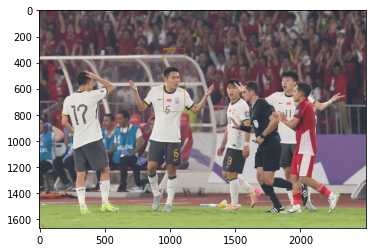

In [6]:
import cv2
from  matplotlib import pyplot as plt
%matplotlib inline

img = cv2.imread("result.jpg")
plt.imshow(img[:,:,::-1])
plt.show()

可以看到，rknn模型推理结果正确，模型转换验证结束。

如需下载转换好的模型，只需右键单击对应模型下载即可。